## Analysis of data from a database (SQL) using Python Programming
This notebook details the analysis on a sqlite file to answer the following questions:
### Questions
1. What are the top 10 jobs in terms of numbers (count)?
2. what are the average total pay and benefits for these jobs?
3. What has been the trend in those jobs from 2011- 2014? 
4. What are the top ten highly paid positions?


In [6]:
import sqlite3

In [7]:
connection = sqlite3.connect('database')

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os

db_path = 'C:/sqlite3/database.sqlite'
print(os.path.exists(db_path))  # should return True

connection = sqlite3.connect(db_path)

True


In [10]:
query = "SELECT name FROM main.sqlite_master WHERE type='table' ORDER BY name; "
tables = pd.read_sql_query(query, connection)

# Display the list of tables
print("Tables in the database:")
print(tables)

Tables in the database:
       name
0  Salaries


In [11]:
salaries_df = pd.read_sql('SELECT * FROM Salaries;',connection)

In [12]:
salaries_df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [13]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [14]:
# Convert 'year' and 'id' to object type
salaries_df['Year'] = salaries_df['Year'].astype('object')
salaries_df['Id'] = salaries_df['Id'].astype('object')

# Convert 'benefits' and 'basepay' to numeric, coercing errors
salaries_df['BasePay'] = pd.to_numeric(salaries_df['BasePay'], errors='coerce')

In [15]:
salaries_df.describe()

,BasePay,TotalPay,TotalPayBenefits
count,148045.000000,148654.000000,148654.000000
mean,66325.448840,74768.321972,93692.554811
std,42764.635495,50517.005274,62793.533483
min,-166.010000,-618.130000,-618.130000
25%,33588.200000,36168.995000,44065.650000
50%,65007.450000,71426.610000,92404.090000
75%,94691.050000,105839.135000,132876.450000
max,319275.010000,567595.430000,567595.430000


In [16]:
salaries_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [17]:
salaries_df.isnull().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             609
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Notes                 0
Agency                0
Status                0
dtype: int64

In [18]:
salaries_df.duplicated().sum()

0

In [19]:
# standardizing the jobtitles by converting each string one to title case
salaries_df['JobTitle'] = salaries_df['JobTitle'].str.strip().str.title()
salaries_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,General Manager-Metropolitan Transit Authority,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,Captain Iii (Police Department),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,Captain Iii (Police Department),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,Wire Rope Cable Maintenance Mechanic,77916.00,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"Deputy Chief Of Department,(Fire Department)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not Provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not Provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not Provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [20]:
#cleaning the data of values not required in the analysis
df_cleaned = salaries_df[salaries_df['JobTitle'].str.lower() != 'not provided']
df = df_cleaned[df_cleaned['BasePay'] != 0]
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,General Manager-Metropolitan Transit Authority,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,Captain Iii (Police Department),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,Captain Iii (Police Department),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,Wire Rope Cable Maintenance Mechanic,77916.00,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"Deputy Chief Of Department,(Fire Department)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148613,148614,Nanette M Lloyd,Special Nurse,19.97,0,0,4.3,19.97,24.27,2014,,San Francisco,PT
148616,148617,Afakasi O Afakasi,Public Service Trainee,21.48,0,0.86,0.22,22.34,22.56,2014,,San Francisco,PT
148617,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0,0,4.04,17.26,21.30,2014,,San Francisco,PT
148619,148620,Ian V Cameron,Is Program Analyst-Assistant,6.04,0,10.05,2.3,16.09,18.39,2014,,San Francisco,PT


In [21]:
#taking a subset od the dataframe
data = df[['EmployeeName', 'JobTitle', 'BasePay', 'TotalPayBenefits', 'Year']]
data

,EmployeeName,JobTitle,BasePay,TotalPayBenefits,Year
0,NATHANIEL FORD,General Manager-Metropolitan Transit Authority,167411.18,567595.43,2011
1,GARY JIMENEZ,Captain Iii (Police Department),155966.02,538909.28,2011
2,ALBERT PARDINI,Captain Iii (Police Department),212739.13,335279.91,2011
3,CHRISTOPHER CHONG,Wire Rope Cable Maintenance Mechanic,77916.00,332343.61,2011
4,PATRICK GARDNER,"Deputy Chief Of Department,(Fire Department)",134401.60,326373.19,2011
...,...,...,...,...,...
148613,Nanette M Lloyd,Special Nurse,19.97,24.27,2014
148616,Afakasi O Afakasi,Public Service Trainee,21.48,22.56,2014
148617,Charles F Williams Iii,Pool Lifeguard,17.26,21.30,2014
148619,Ian V Cameron,Is Program Analyst-Assistant,6.04,18.39,2014


In [22]:
job_counts = data['JobTitle'].value_counts(dropna=False)
job_counts

JobTitle
Transit Operator                              9304
Special Nurse                                 5754
Registered Nurse                              4904
Custodian                                     3190
Firefighter                                   3135
                                              ... 
Senior General Utility Mechanic                  1
Special Assistant Xv                             1
Market Research Specialists, Port                1
Supervising Court Administrative Secretary       1
Forensic Toxicologist Supervis                   1
Name: count, Length: 1631, dtype: int64

## Question 1:  What are the top 10 jobs in terms of numbers (count)?
#### The top 10 jobs by count are Transit Operator, Special Nurse, Registered Nurse, Custodian, Firefighter, Recreation Leader, Deputy Sheriff, Public Svc Aide-Public Works, Police Officer 3 and Patient Care Assistant

In [24]:
# create a copy to avoid modifying the original DataFrame
data_clean = data.copy()

#top 10 job titles 
top_jobs = data_clean['JobTitle'].value_counts().nlargest(10).index
top_jobs

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse', 'Custodian',
       'Firefighter', 'Recreation Leader', 'Deputy Sheriff',
       'Public Svc Aide-Public Works', 'Police Officer 3',
       'Patient Care Assistant'],
      dtype='object', name='JobTitle')

## Question 2: What are the average total pay and benefits for these jobs?
The total pay ranges from **\$6,809.53** (Recreation Leader) to **\$172,080.75** (Firefighter)

In [26]:
# jobtitles in order of their count
# Filter to only include rows with those top job titles
top_jobs_data = data_clean[data_clean['JobTitle'].isin(top_jobs)]

# Group and calculate average TotalBenefitPay
avg_benefit = top_jobs_data.groupby('JobTitle')['TotalPayBenefits'].mean()

# Reorder the result to match the original top_jobs order
avg_benefit = avg_benefit.loc[top_jobs]

# average to 2 decimal points
contingency_table = avg_benefit.round(2).reset_index()
contingency_table.columns = ['JobTitle', 'AverageTotalPayBenefits']

print(contingency_table)

                       JobTitle  AverageTotalPayBenefits
0              Transit Operator                 85422.24
1                 Special Nurse                 35360.48
2              Registered Nurse                141978.72
3                     Custodian                 61768.08
4                   Firefighter                172969.72
5             Recreation Leader                  6811.99
6                Deputy Sheriff                131110.09
7  Public Svc Aide-Public Works                  9633.87
8              Police Officer 3                170976.82
9        Patient Care Assistant                 64935.56


## Question 3:  What has been the trend in those jobs from 2011- 2014?
#### Notable increase in the numbers of professionals has been seen in Transit Operators, Special Nurses and Public Svc Aide-Public Works
#### Decrease was noted for Police Officer 3s and Deputy Sheriffs
#### The dramatic rise in Patient Care Assistants, Police Officer 3s and  Public Svc Aide-Public Works from 2011 to 2012 can be attributed to there being no record of these professions in this database
#### The rest under review have remained largely unchanges.

In [28]:
#Filtering data to only include top 10 job titles (and make another copy to be safe)
filtered_data = data_clean[data_clean['JobTitle'].isin(top_jobs)].copy()

#count job titles per year
job_counts = filtered_data.groupby(['Year', 'JobTitle']).size().reset_index(name='count')

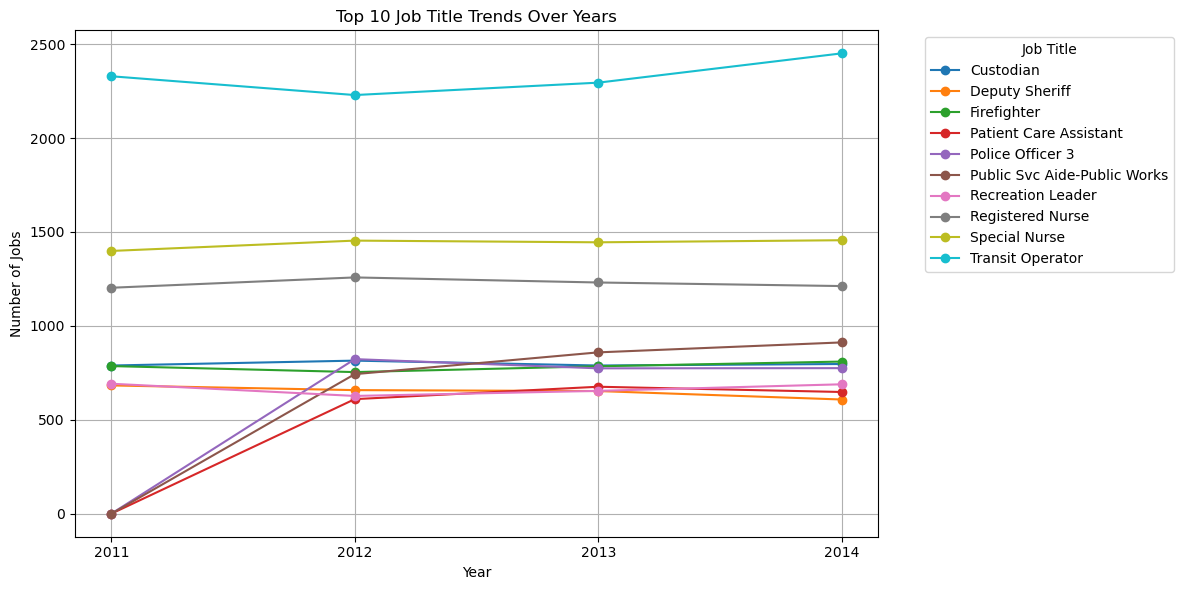

In [29]:

#Pivoting the data for plotting
data_pivot = job_counts.pivot(index='Year', columns='JobTitle', values='count').fillna(0)

#Ensuring Year is int (avoids decimal tick labels)
data_pivot.index = data_pivot.index.astype(int)

#Plot
ax = data_pivot.plot(kind='line', marker='o', figsize=(12, 6))

# Set callibration of  x-axis (ticks) to integer labels- no decimals
ax.set_xticks(data_pivot.index)
ax.set_xticklabels(data_pivot.index.astype(str))

plt.title('Top 10 Job Title Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
data[(data['Year'] == 2011) & (data['JobTitle'] == 'Police Officer 3')]

,EmployeeName,JobTitle,BasePay,TotalPayBenefits,Year


In [31]:
data[(data['Year'] == 2011) & (data['JobTitle'] == 'Patient Care Assistant')]

,EmployeeName,JobTitle,BasePay,TotalPayBenefits,Year


In [32]:
data[(data['Year'] == 2011) & (data['JobTitle'] == 'Public Svc Aide-Public Works')]

,EmployeeName,JobTitle,BasePay,TotalPayBenefits,Year


## Question 4: What are the top 10 highly paid jobs?
##### The top 10 highly paid jobs range from **\$343,598** to **\$436,224**
##### The highest paid is the Chief Investigating Officer and the 10th most paid is the Assistant Chief of Department (Fire Dept)

In [34]:

#Group by JobTitle and get the mean of TotalPayBenefits
top_jobs_avg_pay = data.groupby('JobTitle')['TotalPayBenefits'].mean().nlargest(10)

# Extract the job titles
toppay_jobs = top_jobs_avg_pay.index

#Filter the data to only include these top 10 job titles
filtered_data = data[data['JobTitle'].isin(toppay_jobs)]

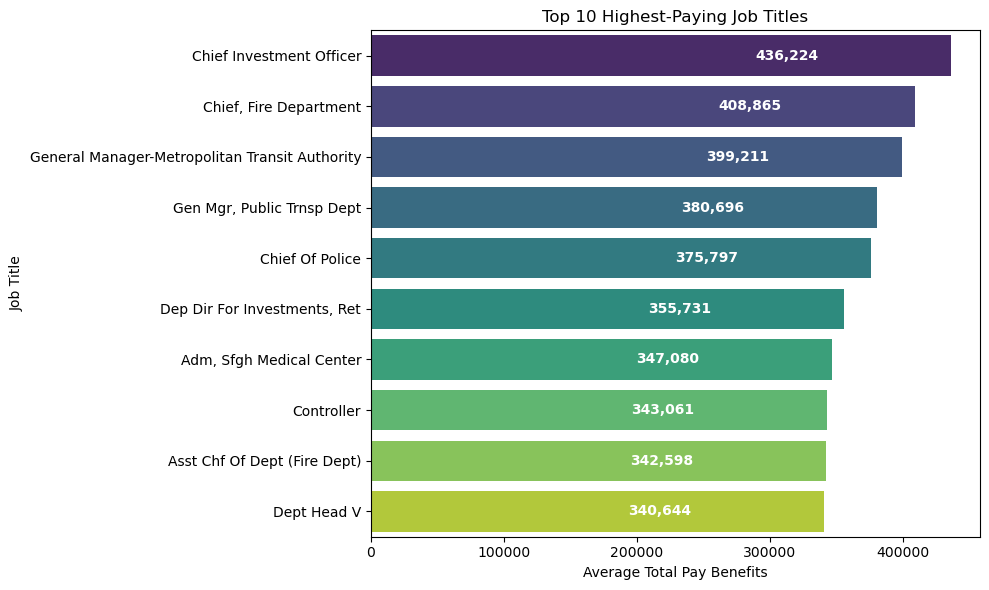

In [35]:

#the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_jobs_avg_pay.values, y=top_jobs_avg_pay.index, palette='viridis', hue=top_jobs_avg_pay.index, legend=False)

#labels and title
plt.title('Top 10 Highest-Paying Job Titles')
plt.xlabel('Average Total Pay Benefits')
plt.ylabel('Job Title')

# display average values in the bars
for i, v in enumerate(top_jobs_avg_pay.values):
    ax.text(v - 100000, i, f'{v:,.0f}', va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [36]:
connection.close()

In [47]:
df.to_csv('payroll.csv', index=False)
